In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

# Data Pre-processing

In [84]:
from sklearn.impute import SimpleImputer
import numpy as np

# Imputing missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[['LoanAmount', 'Loan_Amount_Term']] = num_imputer.fit_transform(df[['LoanAmount', 'Loan_Amount_Term']])

# Imputing missing values for categorical columns with mode
# First, calculate the mode (most frequent value) for each column
cat_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any missing values left
df.isnull().sum()

In [85]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [107]:
df["Loan_Status"] = (df["Loan_Status"] == "Y").astype(int)
df = df.drop(columns=["Loan_ID"], axis=1)
# In dependents column, there is a value 3+ which is not a number. So, we need to replace it with a number.
df["Dependents"] = df["Dependents"].replace("3+", 3)
df["Dependents"] = df["Dependents"].astype(float)

In [19]:
# df = df.fillna(df.mean())

# # Fill missing values in binary columns with the most common value
# cols = ["Gender", "Married", "Self_Employed"]
# for col in cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

In [108]:
# Drop all null levels

df = df.dropna()


In [109]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Dependents","Education","Self_Employed", "Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [110]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

    # EDA

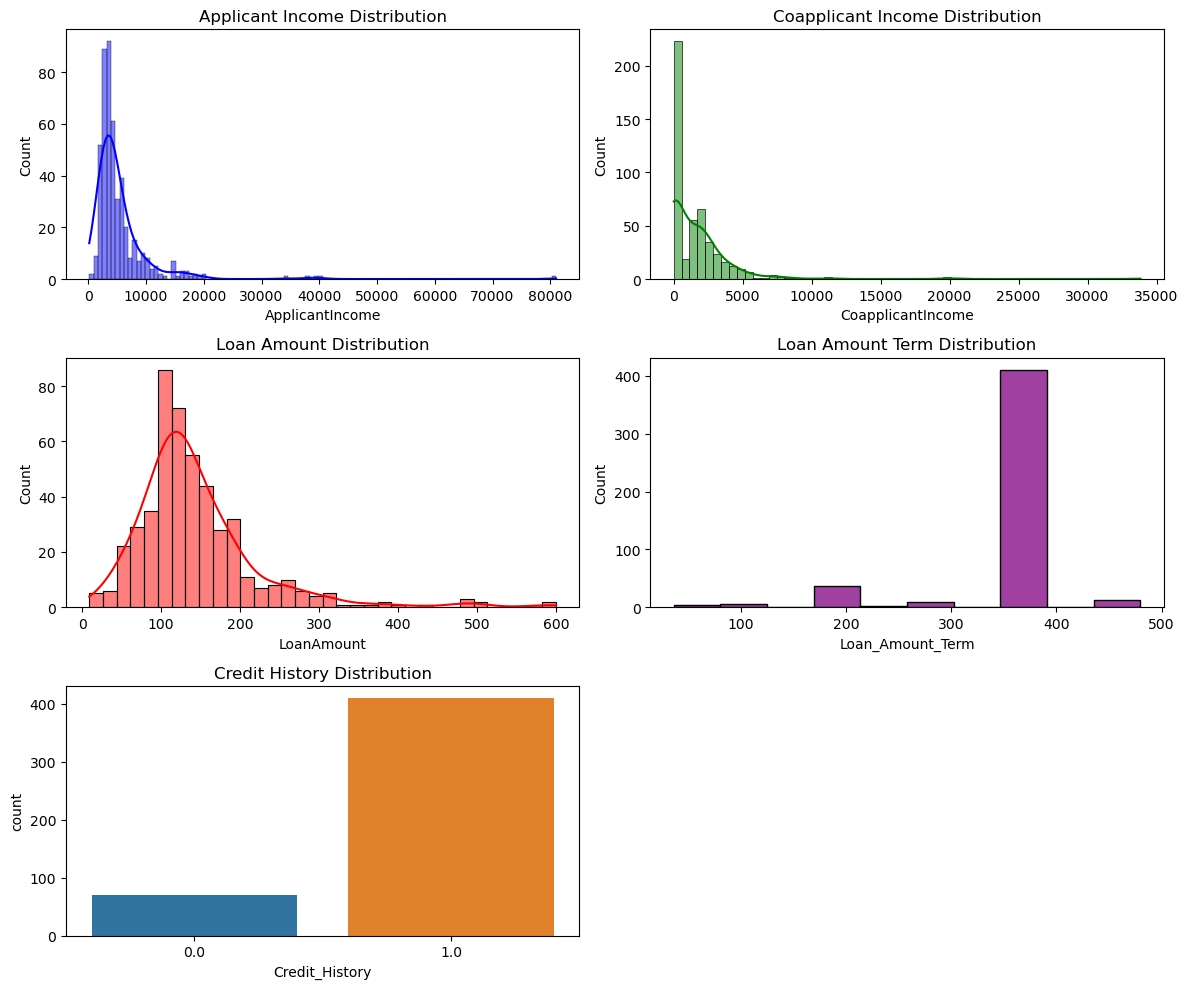

In [45]:
# Setting up the figure size and background color
plt.figure(figsize=(12, 10), facecolor='white')

# Plotting distributions of numerical variables
plt.subplot(3, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='blue')
plt.title('Applicant Income Distribution')

plt.subplot(3, 2, 2)
sns.histplot(df['CoapplicantIncome'], kde=True, color='green')
plt.title('Coapplicant Income Distribution')

plt.subplot(3, 2, 3)
sns.histplot(df['LoanAmount'], kde=True, color='red')
plt.title('Loan Amount Distribution')

plt.subplot(3, 2, 4)
sns.histplot(df['Loan_Amount_Term'], kde=False, color='purple')
plt.title('Loan Amount Term Distribution')

plt.subplot(3, 2, 5)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History Distribution')

plt.tight_layout()
plt.show()

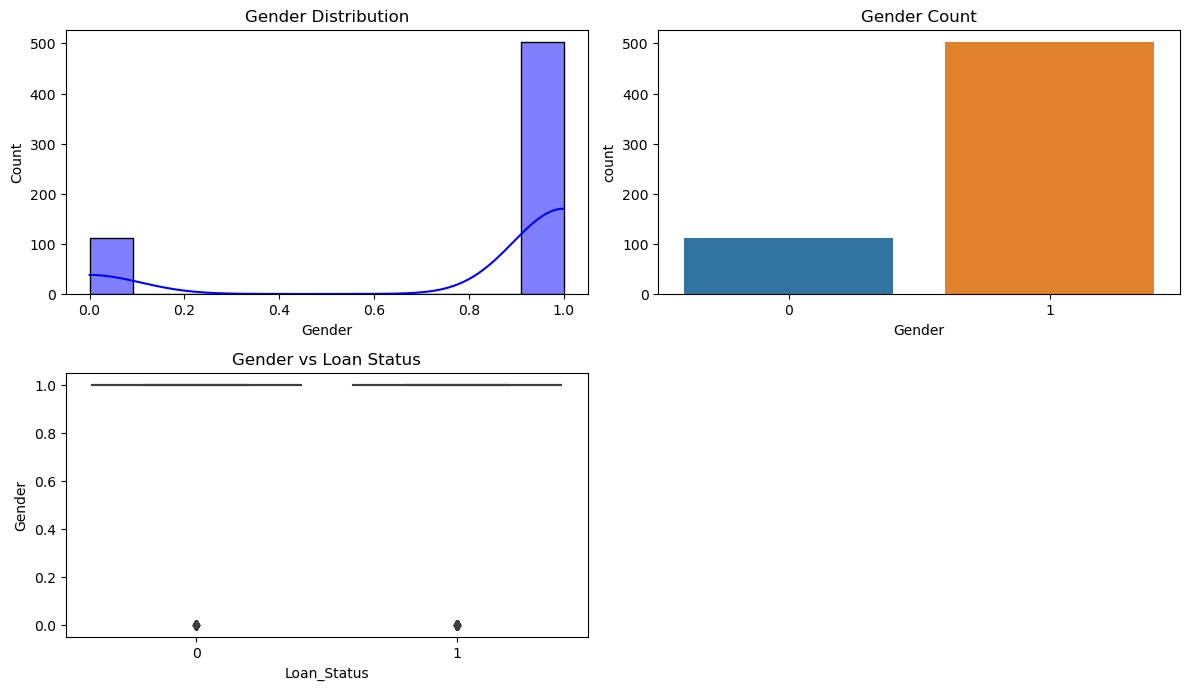

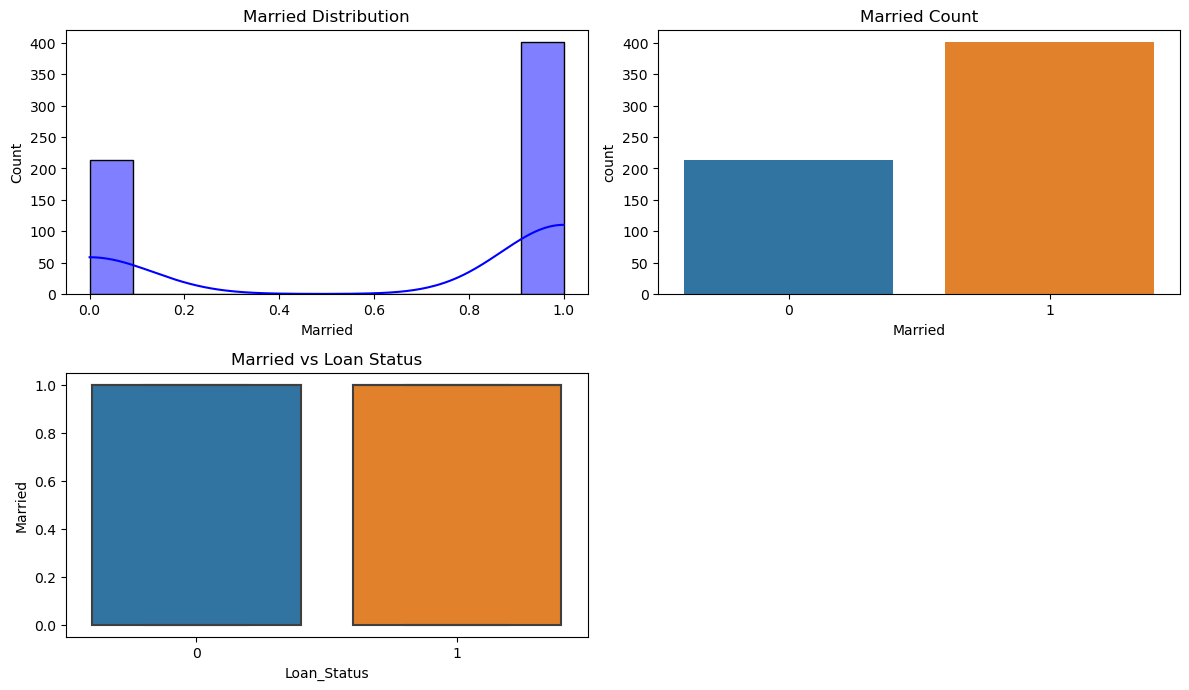

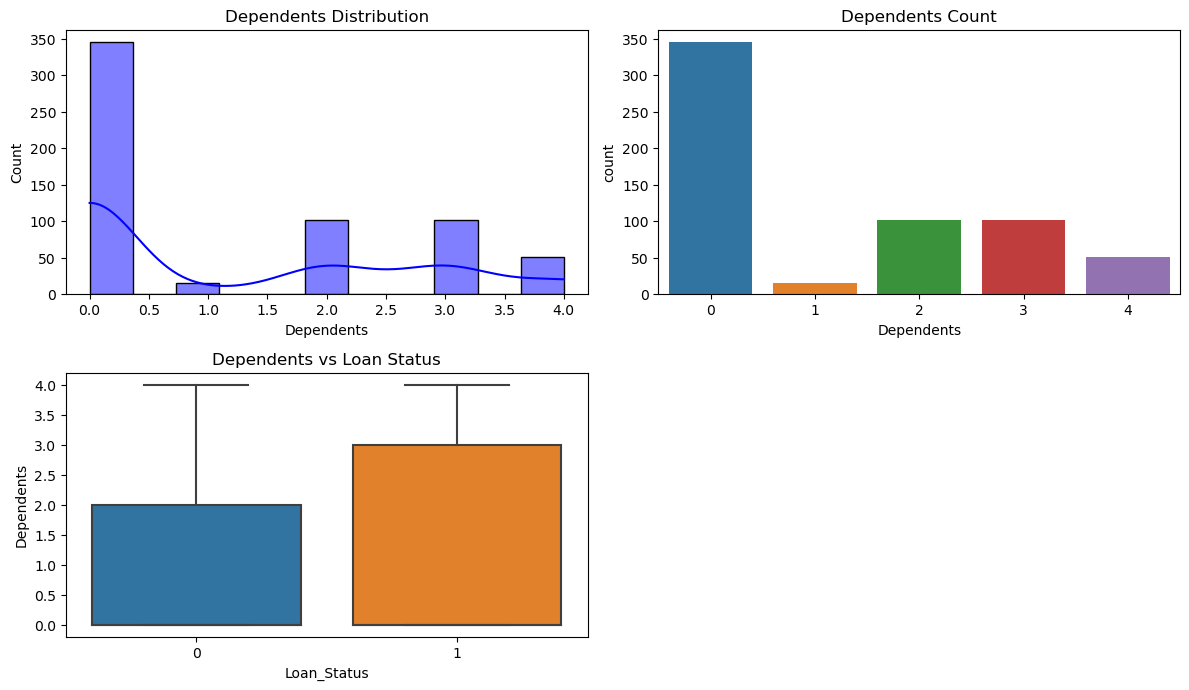

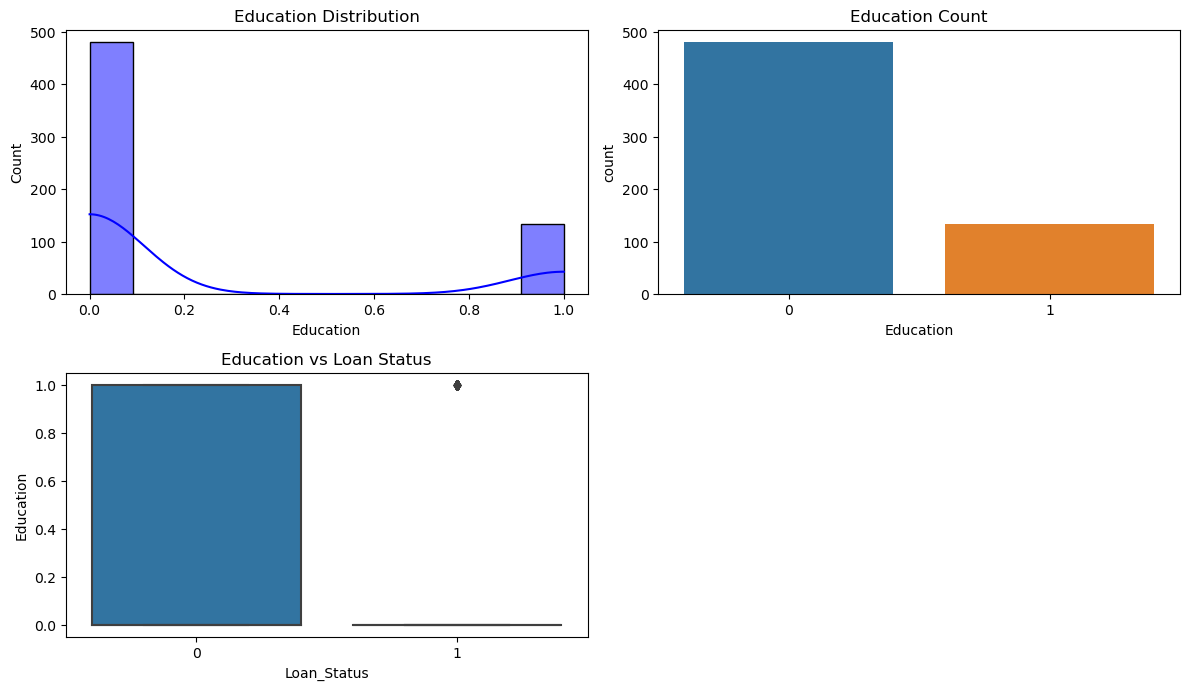

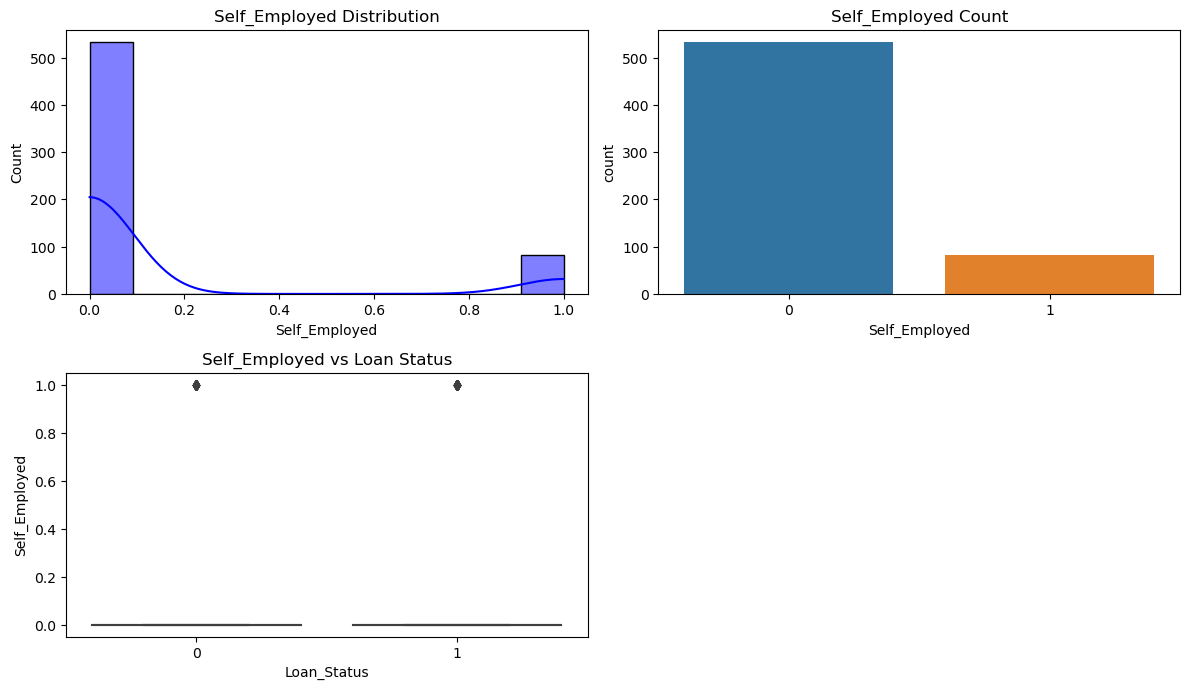

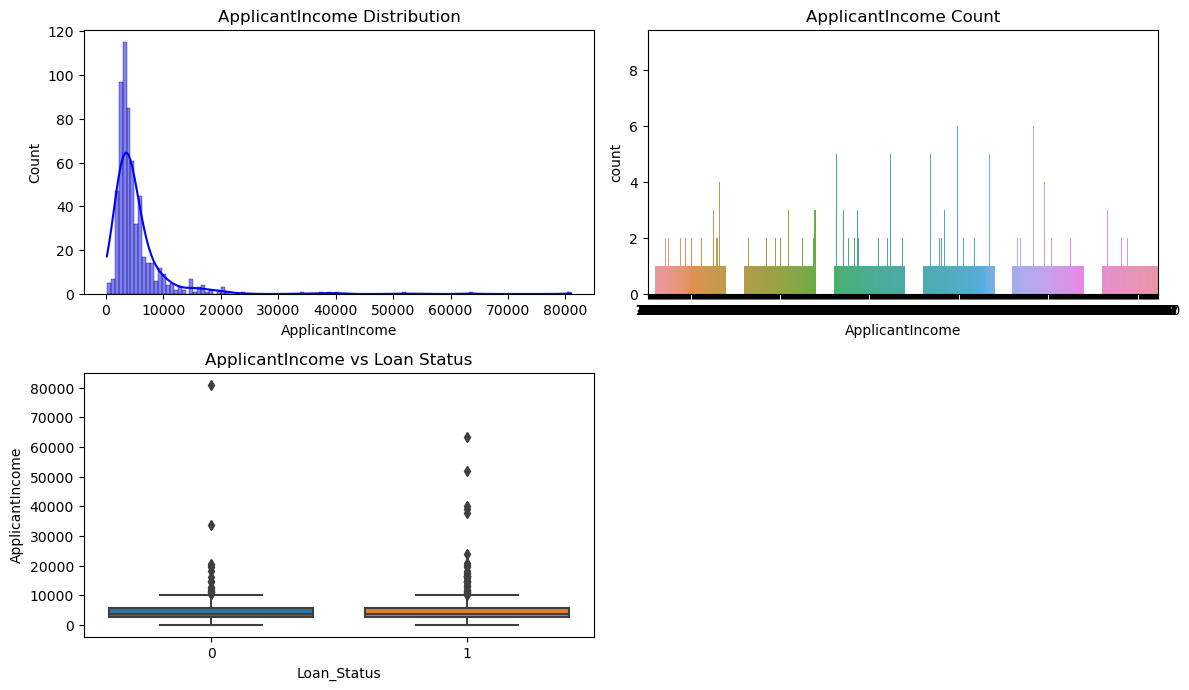

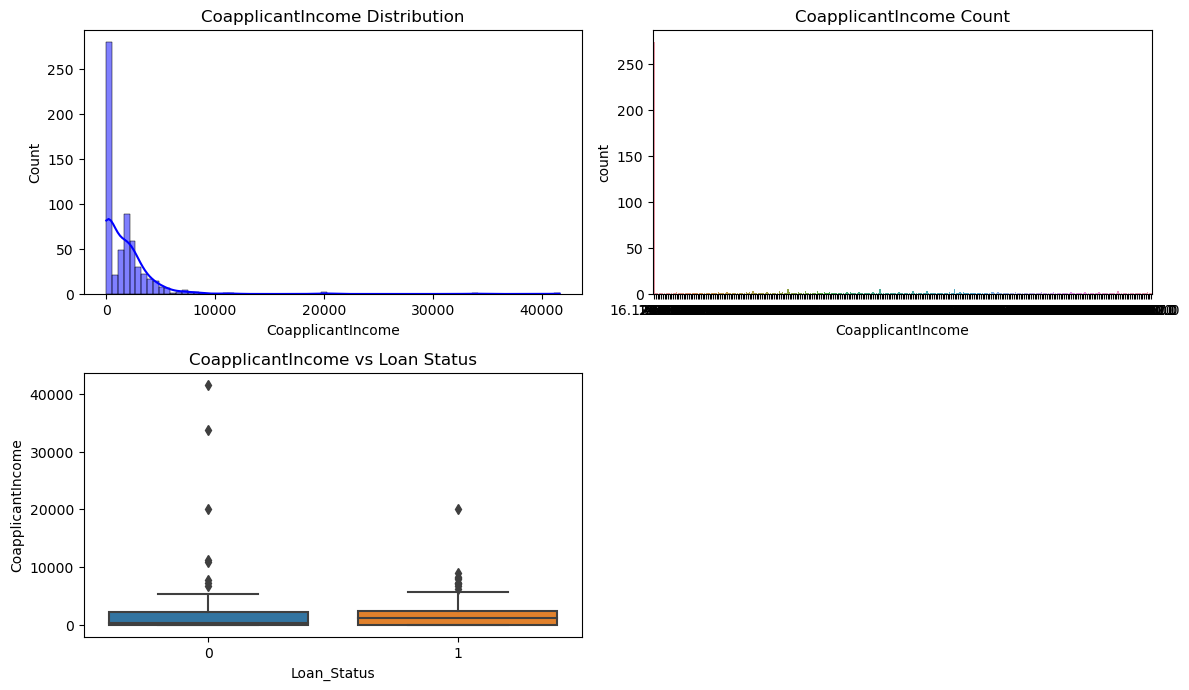

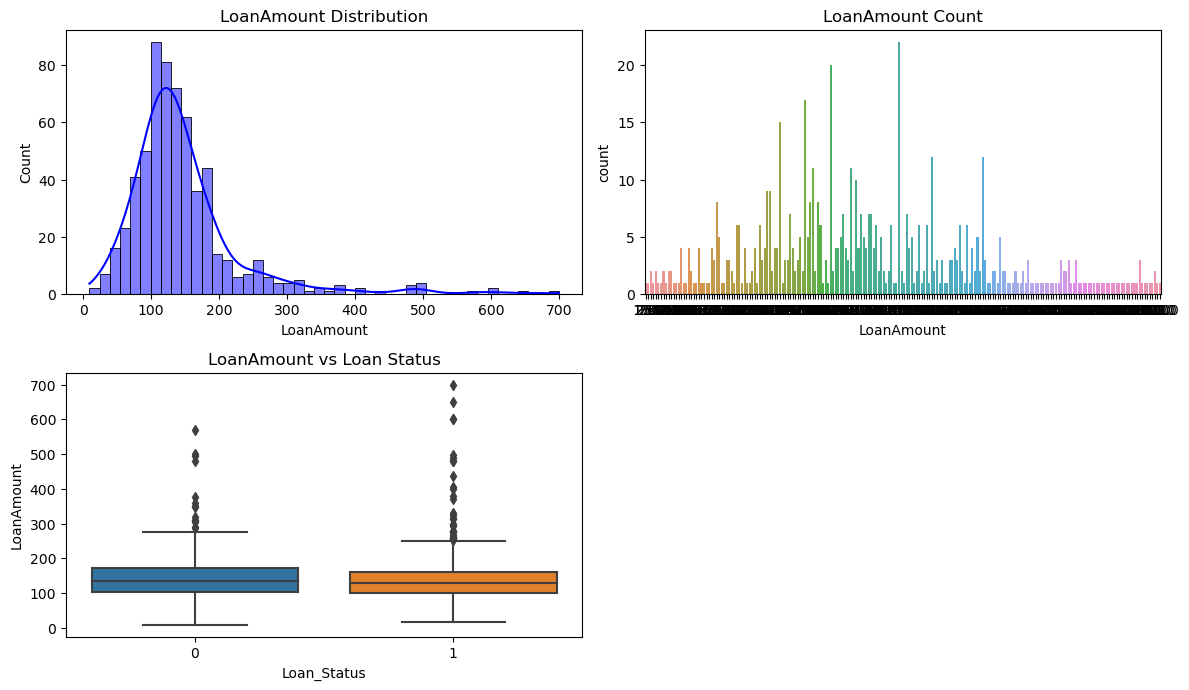

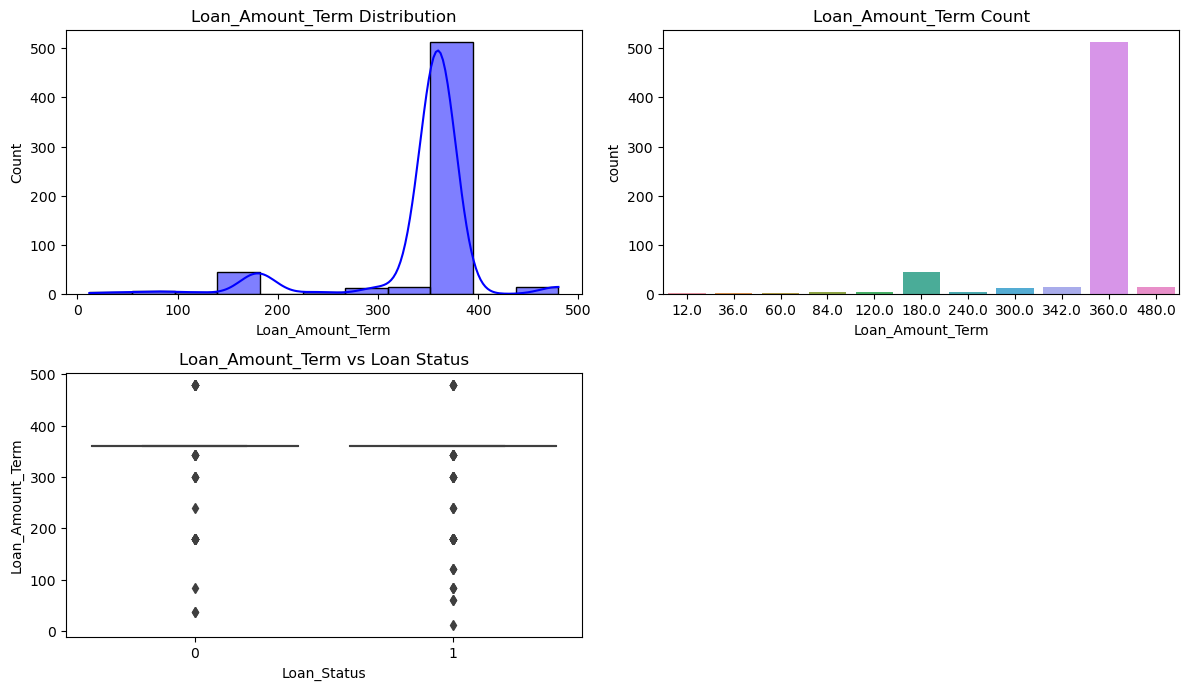

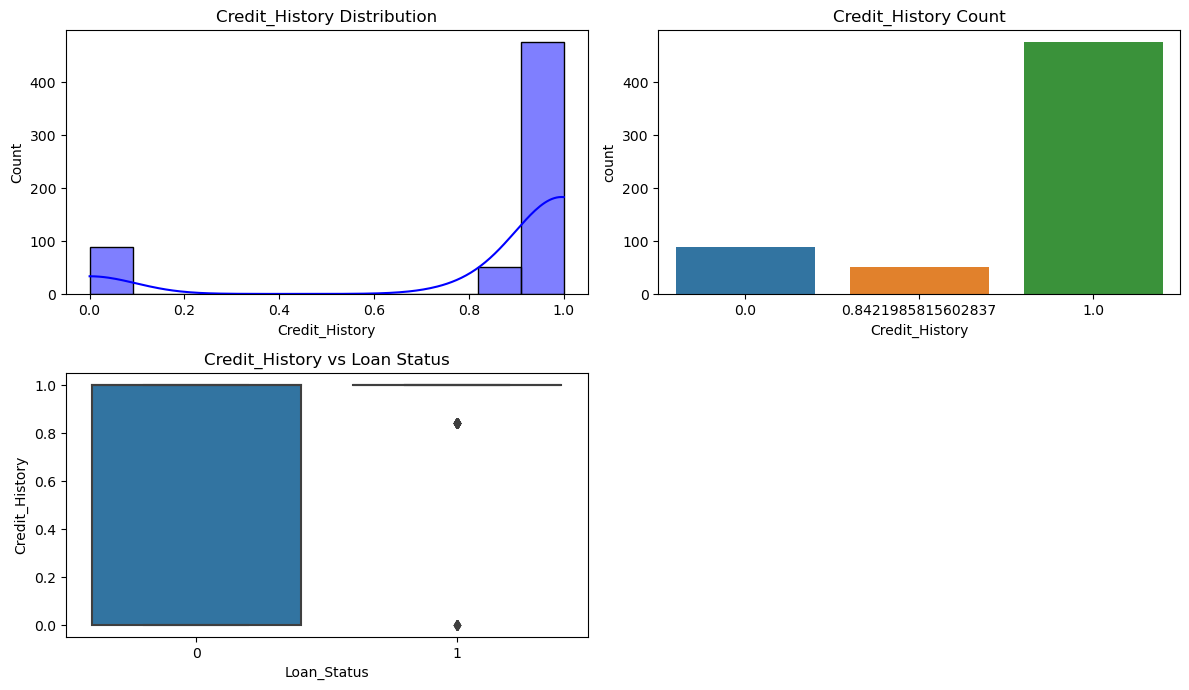

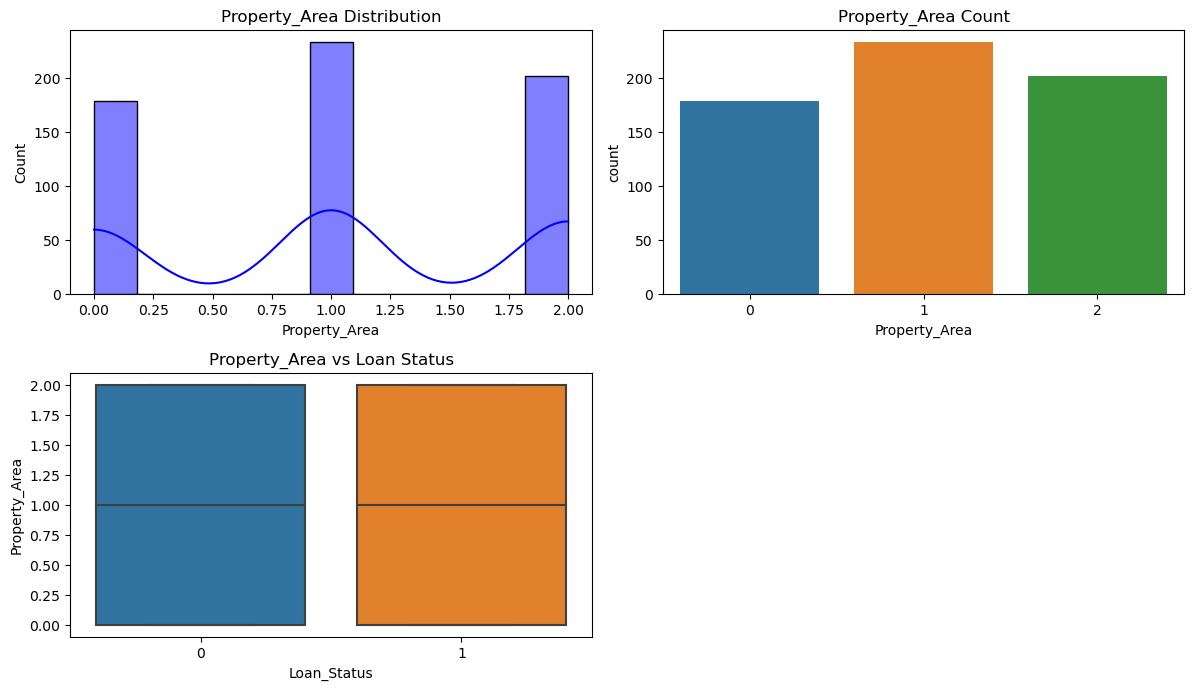

In [60]:
for label in df.columns[:-1]:
  #plot 3 different plots for each feature in one row

  # Setting up the figure size and background color
  plt.figure(figsize=(12, 10), facecolor='white')

  # Plotting distributions of numerical variables
  plt.subplot(3, 2, 1)
  sns.histplot(df[label], kde=True, color='blue')
  plt.title(label + ' Distribution')

  plt.subplot(3, 2, 2)
  sns.countplot(x=label, data=df)
  plt.title(label + ' Count')

  plt.subplot(3, 2, 3)
  sns.boxplot(x='Loan_Status', y=label, data=df)
  plt.title(label + ' vs Loan Status')

  plt.tight_layout()
  plt.show()


# Prediction

In [111]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

 
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [117]:
train = pd.read_csv("split/TrainSet.csv")
test = pd.read_csv("split/TestSet.csv")
validation = pd.read_csv("split/ValidationSet.csv")

In [118]:
X_train = train.drop(columns=["Loan_Status"], axis=1)
y_train = train["Loan_Status"]

X_test = test.drop(columns=["Loan_Status"], axis=1)
y_test = test["Loan_Status"]

X_val = validation.drop(columns=["Loan_Status"], axis=1)
y_val = validation["Loan_Status"]

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.25,4843,3806.0,151.0,360.0,1.000000,0,1,1,0,1,0,1,0,0,1,0
1,0.25,3167,2283.0,154.0,360.0,1.000000,1,0,0,1,1,0,1,0,0,1,0
2,0.25,12000,0.0,164.0,360.0,1.000000,0,1,1,0,1,0,1,0,0,1,0
3,0.25,3463,0.0,122.0,360.0,0.835189,1,0,1,0,1,0,0,1,0,0,1
4,0.25,2971,2791.0,144.0,360.0,1.000000,0,1,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.25,3182,2917.0,161.0,360.0,1.000000,0,1,1,0,1,0,1,0,0,0,1
487,1.00,3850,983.0,100.0,360.0,1.000000,0,1,0,1,0,1,1,0,0,1,0
488,0.75,3273,1820.0,81.0,360.0,1.000000,0,1,0,1,0,1,1,0,0,0,1
489,0.25,4300,2014.0,194.0,360.0,1.000000,0,1,0,1,0,1,1,0,1,0,0


In [112]:
def scale_dataset(dataframe):
  X = dataframe[dataframe.columns[:-1]].values #2D array
  Y = dataframe[dataframe.columns[-1]].values #1D array

  scaler = StandardScaler() #initializing standard scaler
  X = scaler.fit_transform(X) #Scaling training dataset

  # if(oversample):
  #   ros = RandomOverSampler()
  #   X, Y = ros.fit_resample(X, Y)


  data = np.hstack((X, np.reshape(Y, (-1, 1)))) #Stacking 2 arrays horizontally

  return data, X, Y;

In [113]:
train_data, X_train, y_train = scale_dataset(train)
test_data, X_test, y_test = scale_dataset(test)

In [119]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Build a Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Model evaluation
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='binary')

print('Best Random Forest Model - Accuracy:', accuracy_best_rf)
print('Best Random Forest Model - Precision:', precision_best_rf)

Best Random Forest Model - Accuracy: 0.78125
Best Random Forest Model - Precision: 0.821917808219178


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


In [121]:
import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0,
  )

  #can also use validation_split=0.2

  return nn_model, history

In [122]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

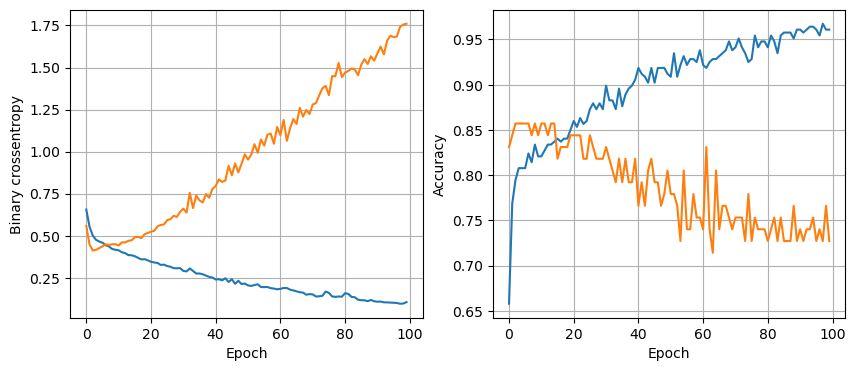

In [123]:
epochs= 100
model, history = train_model(X_train, y_train, 16, 0, 0.01, 32, epochs)

plot_history(history)


In [127]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.6).astype(int)

accuracy = accuracy_score(y_test, y_pred)

3/3 [==============================] - 0s 4ms/step


In [ ]:
least_val_loss = float('inf')
best_params = None
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X, y, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_test, test["Loan_Status"], verbose=0)[0]
        if val_loss < least_val_loss:
          best_params = (num_nodes, dropout_prob, lr, batch_size)
          least_val_loss = val_loss
          least_loss_model = model

In [58]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(test["Loan_Status"], y_pred))
print(f"Best params: {best_params} with loss: {least_val_loss}")

accuracy_score(test["Loan_Status"], y_pred)

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.65      1.00      0.78        62

    accuracy                           0.65        96
   macro avg       0.32      0.50      0.39        96
weighted avg       0.42      0.65      0.51        96

Best params: (16, 0.2, 0.005, 128) with loss: 0.6511810421943665


d:\Software\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6458333333333334